In [16]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn import preprocessing

In [17]:
data = pd.read_csv("kc_house_data.csv")
print(data.dtypes)
data.head()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
data['square'] = (data['sqft_living'] + data['sqft_lot'] + data['sqft_above'] + data['sqft_basement'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,square
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,8010
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12382
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,11540
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8920
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,11440


In [19]:
data['UnitPrice'] = data['price']/(data['square'])
data['UnitPrice'].describe()

count    21613.000000
mean        46.530376
std         31.035134
min          0.162920
25%         24.176744
50%         38.683603
75%         61.602113
max        248.552124
Name: UnitPrice, dtype: float64

In [30]:
data['UnitPrice'] = data['price']/(data['square'])
def setUnitPrice(row):
    if row["UnitPrice"] < 10:
        return 0
    elif row["UnitPrice"] < 20:
        return 1
    elif row["UnitPrice"] < 30:
        return 2
    elif row["UnitPrice"] < 40:
        return 3
    elif row["UnitPrice"] < 50:
        return 4
    elif row["UnitPrice"] < 60:
        return 5
    elif row["UnitPrice"] < 70:
        return 6
    elif row["UnitPrice"] < 80:
        return 7
    elif row["UnitPrice"] < 90:
        return 8
    elif row["UnitPrice"] < 100:
        return 9
    elif row["UnitPrice"] < 120:
        return 10
    elif row["UnitPrice"] < 150:
        return 11
    elif row["UnitPrice"] < 200:
        return 12
    else:
        return 13
data = data.assign(UnitPrice = data.apply(setUnitPrice,axis = 1))

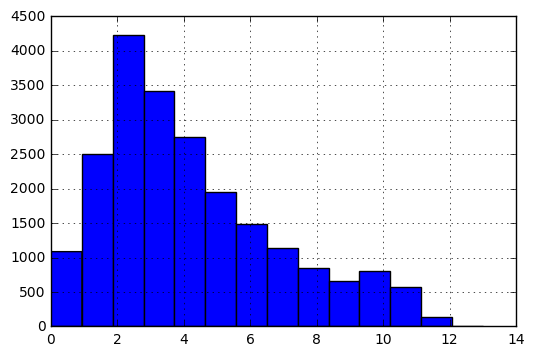

In [31]:
hist = data['UnitPrice'].hist(bins=14)

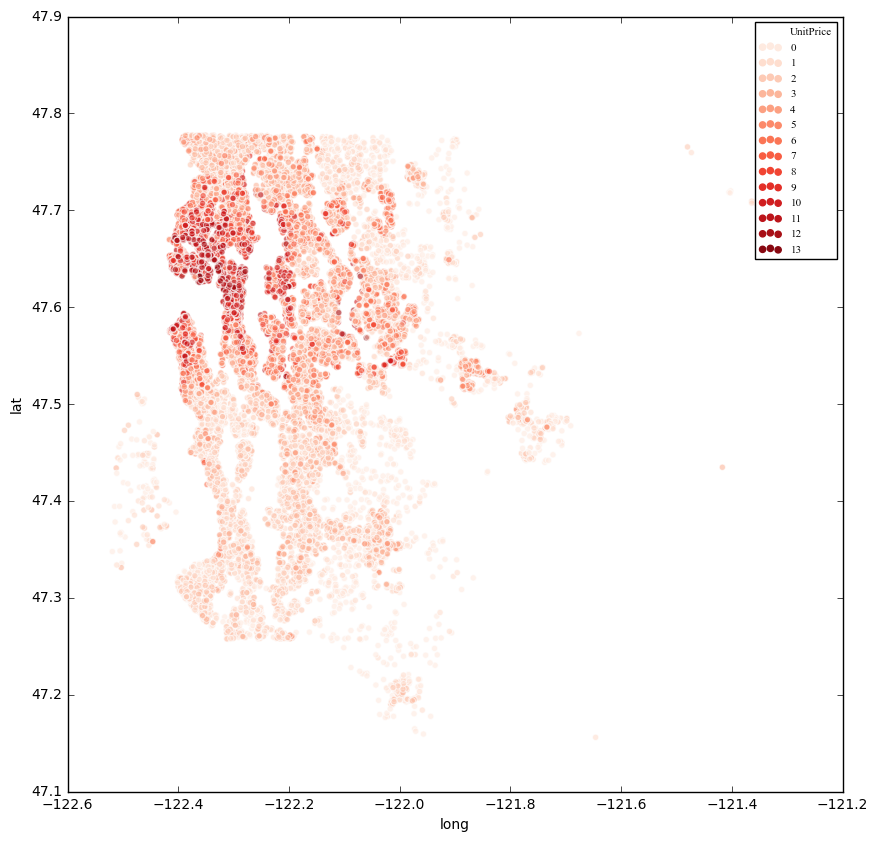

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="long", y="lat", hue="UnitPrice", palette=sns.color_palette("Reds", n_colors=14), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

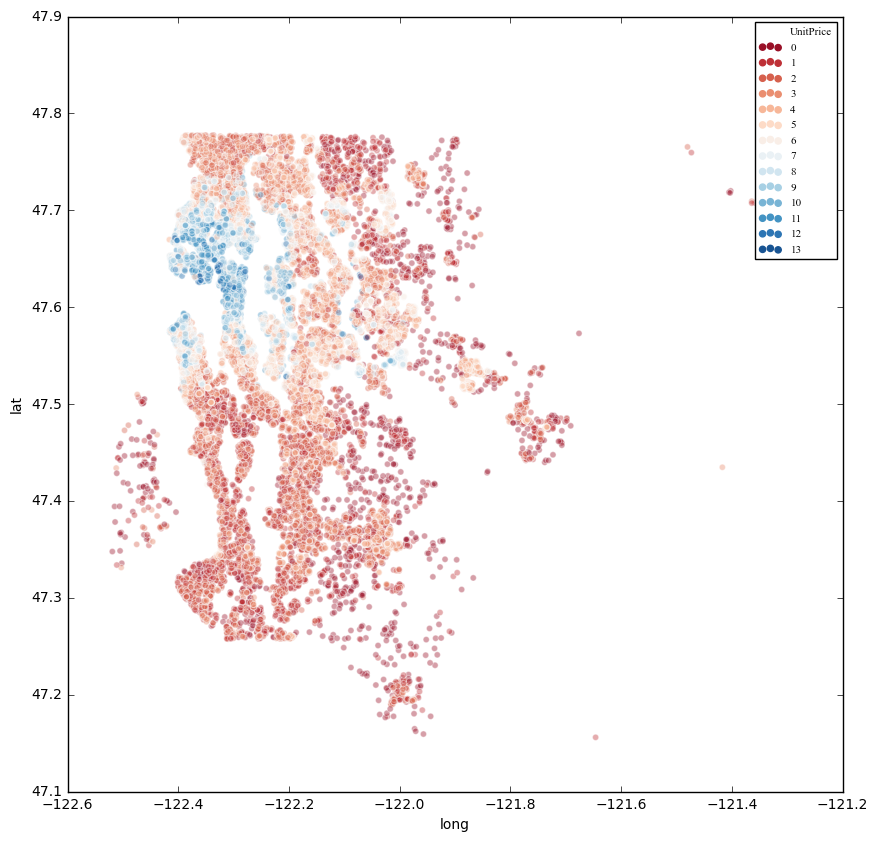

In [35]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="long", y="lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=14), data=data, legend="brief", alpha=0.4)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [7]:
feature = ["Lng", "Lat", "followers", "square","livingRoom", "drawingRoom", "kitchen", 
           "bathRoom", "buildingType", "constructionTime", "renovationCondition", "buildingStructure", 
           "elevator", "fiveYearsProperty", "subway", "district"]
data_X = data[feature]
data_y = data["UnitPrice"]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=61)
plotdata = X_test.copy()
print(X_train.shape)
print(X_test.shape)

(7305, 16)
(2435, 16)


In [23]:
y_test[4739]

4

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=120)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.17982165  0.18475436  0.11521244  0.13443654  0.03473469  0.0232192
  0.0027392   0.01622207  0.0270953   0.10083222  0.03262794  0.01611381
  0.01171458  0.02263005  0.01733006  0.08051591]
0.589733059548


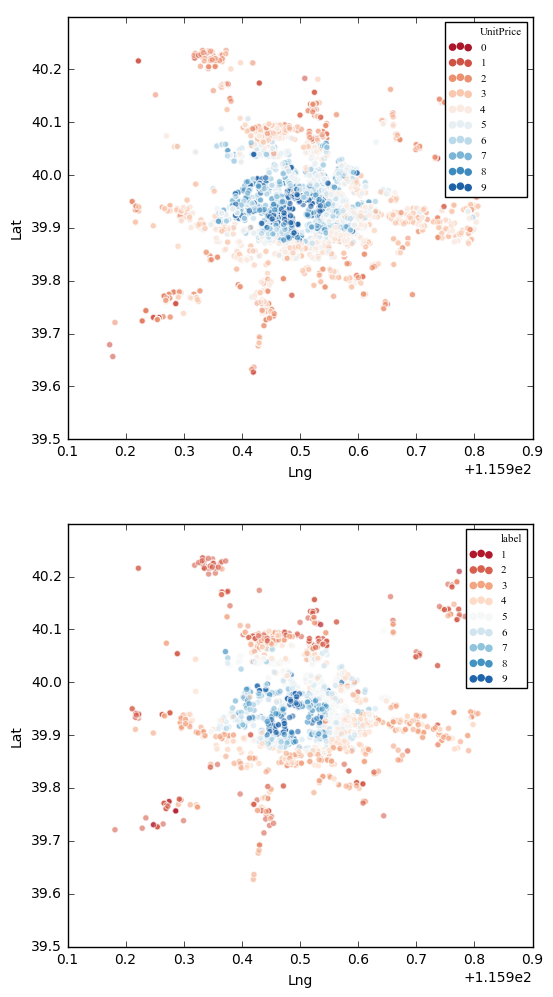

In [10]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=5)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.16194754  0.18127003  0.13118866  0.22641674  0.0202285   0.06815182
  0.00325342  0.01490332  0.01663117  0.07202451  0.02216906  0.01518331
  0.00971901  0.01292651  0.00910202  0.03488438]
0.590554414784


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.feature_importances_)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
[ 0.1786522   0.23485911  0.12895709  0.15702425  0.02944646  0.01810557
  0.00200946  0.00677072  0.02127075  0.09599512  0.02720476  0.00821561
  0.00687097  0.01860886  0.01134224  0.05466681]
0.525256673511


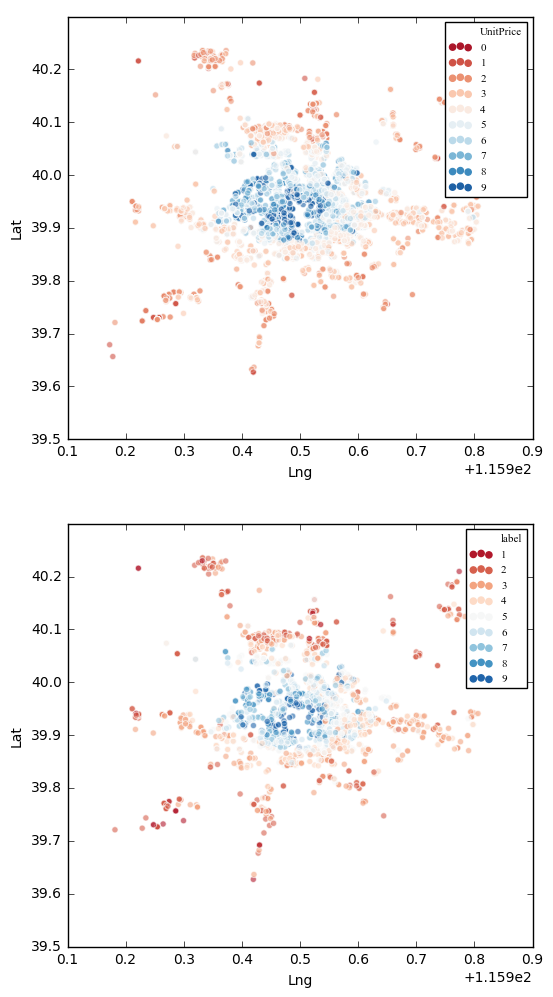

In [13]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(clf.score(X_test, y_test))

0.227515400411


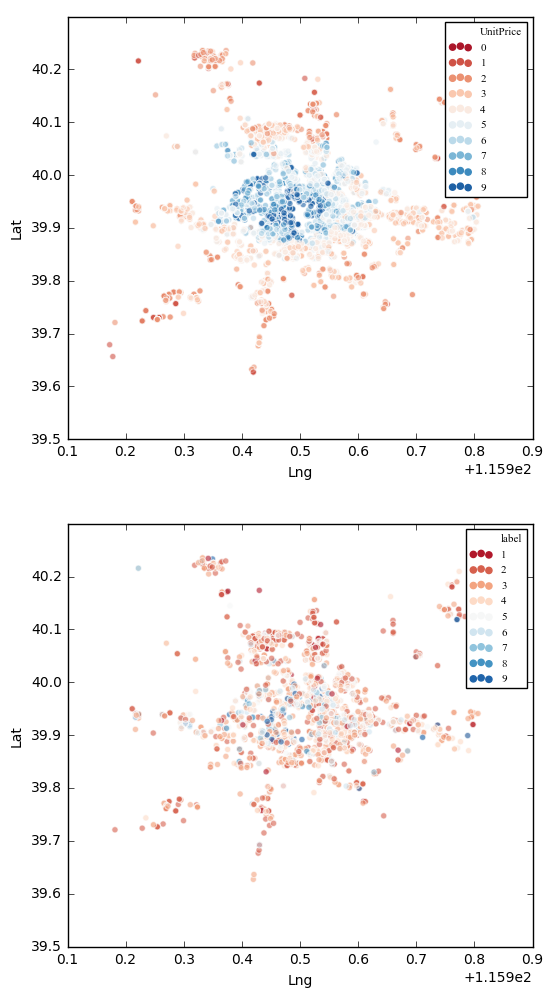

In [15]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [16]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
0.245585215606


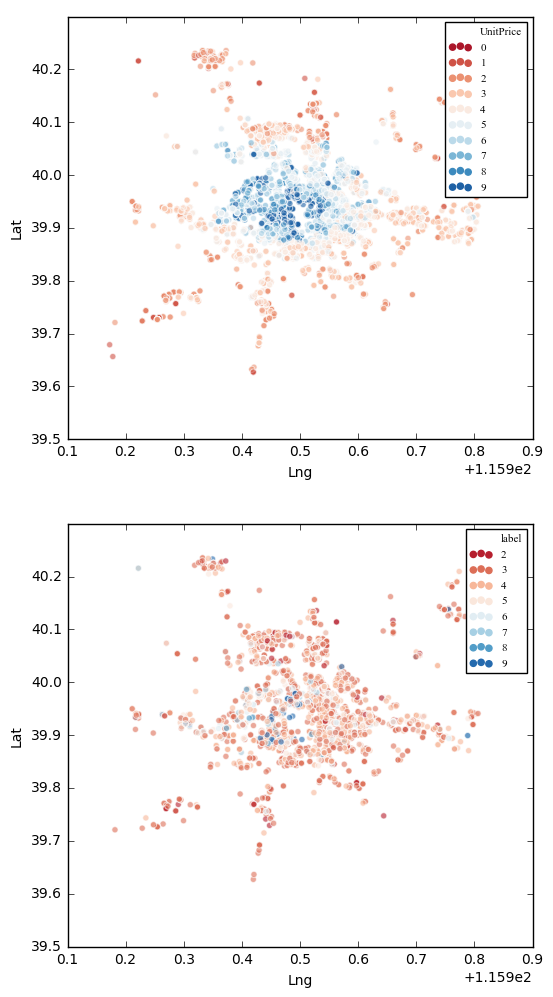

In [17]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=8), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
print(feature)
print(clf.score(X_test, y_test))

['Lng', 'Lat', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'elevator', 'fiveYearsProperty', 'subway', 'district']
0.328542094456


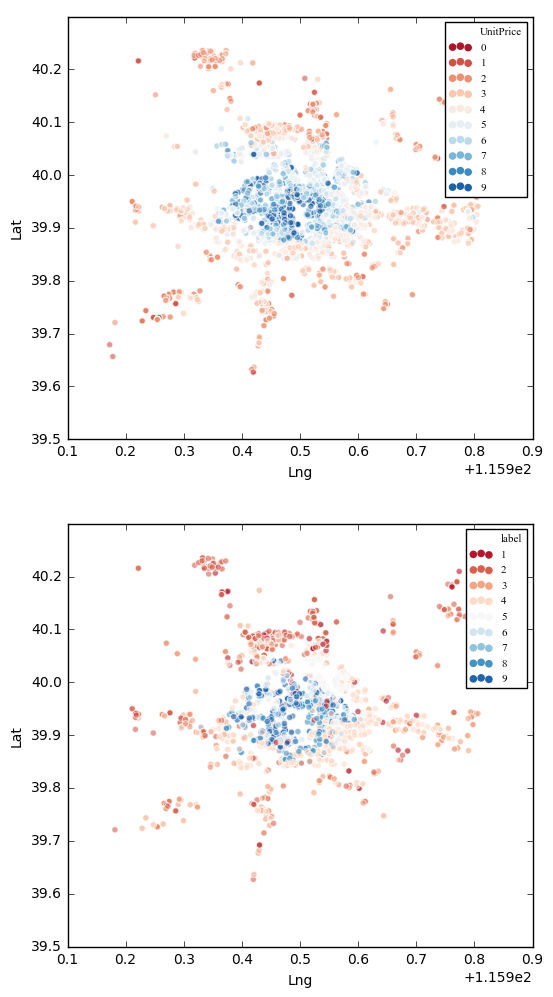

In [19]:
plt.figure(figsize=(6,12))
plotdata["label"] = predict
plt.subplot(2,1,1)
sns.scatterplot(x="Lng", y="Lat", hue="UnitPrice", palette=sns.color_palette("RdBu", n_colors=10), data=data, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.subplot(2,1,2)
sns.scatterplot(x="Lng", y="Lat", hue="label", palette=sns.color_palette("RdBu", n_colors=9), data=plotdata, legend="brief", alpha=0.6)
plt.legend(prop={'family' : 'Times New Roman', 'size': 8})
plt.show()